<a href="https://colab.research.google.com/github/johnitodo/Cardio-GoodFitness/blob/main/LoanPredModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing our basic operational libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

#Importing all required models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

#Importing our model evaluation metrices
from sklearn import metrics 
from sklearn.metrics import precision_score, accuracy_score, recall_score,f1_score, classification_report

In [3]:
#importing our data uploader into our environment
from google.colab import files
uploaded = files.upload()

Saving Loan_Modelling.csv to Loan_Modelling.csv


In [5]:
#Importing our dataset into the environment
df = pd.read_csv('Loan_Modelling.csv')

####**Exploratory Data Analysis**

In [6]:
#Checking 5 random samples from our dataset
df.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
780,781,32,7,42,92634,4,0.8,1,0,0,0,0,1,1
4150,4151,46,20,72,92009,2,1.7,2,75,0,0,0,1,0
3392,3393,32,7,58,92612,1,1.0,1,0,0,0,0,1,0
1612,1613,41,17,33,94550,1,0.7,1,104,0,0,0,0,0
2733,2734,55,29,72,93107,3,0.3,2,147,0,0,0,0,0


In [7]:
#Checking for empty values in rows
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

From the dataset we dont have any column with an empty row.

In [8]:
#Checking for duplicate values in rows
df.duplicated().sum()

0

From the dataset we dont have any column with duplicate values.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


From the descriptive statistics, it is observed that some of our columns have data that are skewed, comparing the 50th percentile and the mean. However, a larger portion of our dataset are not skewed. Also on our experience column we have the minimum to be -3 this is an anormally as experience can not have a negative value.

#### **Data Cleaning**

In [10]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

**Observation**
We can see that we have 3 values with a (-), this could be due to an error in data inputing. I will replace all negative values with the positive values

In [11]:
#Running a loop to catch our already established negative values and removing them.
for ind, val in enumerate(df['Experience']):
  if val == -1:
    df.loc[ind, 'Experience'] = 1
  elif val == -2:
    df.loc[ind, 'Experience'] = 2
  elif val == -3:
    df.loc[ind, 'Experience'] = 3


#### **Data Visualisation**

Visualising our columns to draw insights

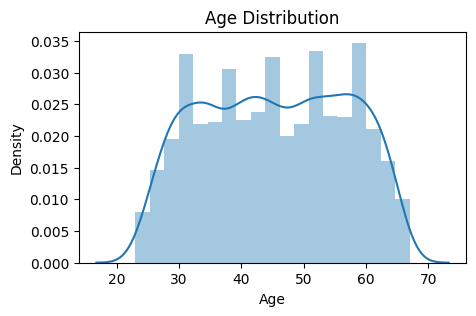

In [12]:
plt.figure(figsize =(5,3))
sns.distplot(df['Age'])
plt.title('Age Distribution');

Our age column is evenly distributed

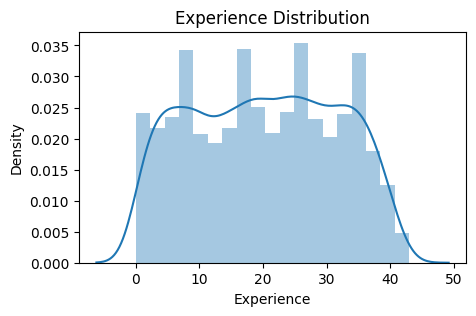

In [13]:
plt.figure(figsize =(5,3))
sns.distplot(df['Experience'])
plt.title('Experience Distribution');

Our Experience column looks normally distributed.

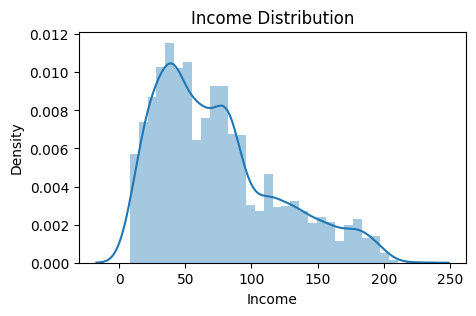

In [14]:
plt.figure(figsize =(5,3))
sns.distplot(df['Income'])
plt.title('Income Distribution');

Our income column is skewed to the right side of the chart.

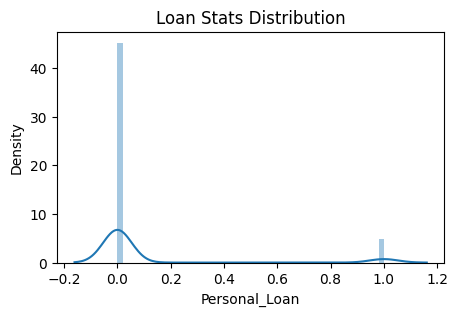

In [15]:
plt.figure(figsize =(5,3))
sns.distplot(df['Personal_Loan'])
plt.title('Loan Stats Distribution');

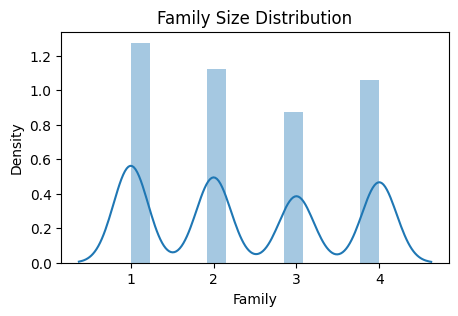

In [16]:
plt.figure(figsize =(5,3))
sns.distplot(df['Family'])
plt.title('Family Size Distribution');

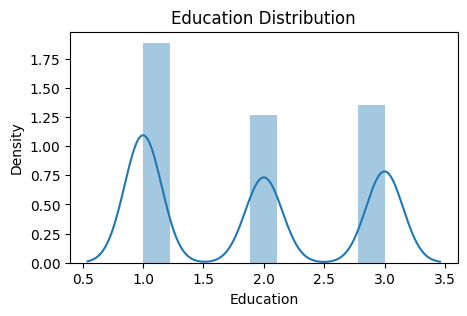

In [17]:
plt.figure(figsize =(5,3))
sns.distplot(df['Education'])
plt.title('Education Distribution');

We can see from the boxplot that our population age is well evenly distributed with mean of 45 and a large portion of the age distribution between 35 and 55 years.

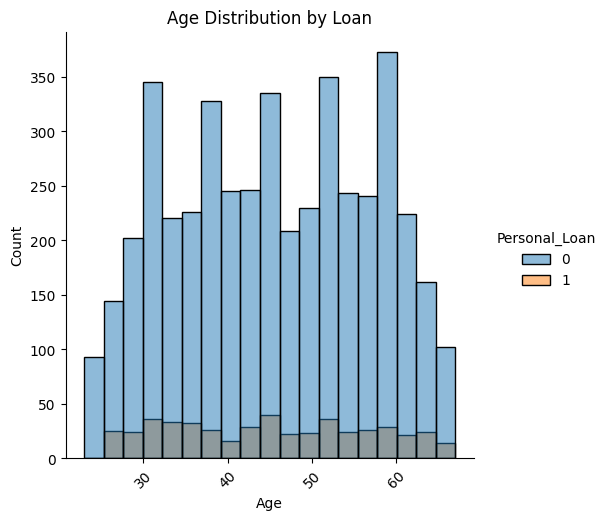

In [18]:
sns.displot(df, x='Age', hue='Personal_Loan')
plt.xticks(rotation =45)
plt.title('Age Distribution by Loan')
plt.show()

From the above information we can see that from this campaign we had a larger population of the target audience who did not secure a loan. Also, there are small groups of customers spread across the age range who secured a loan.

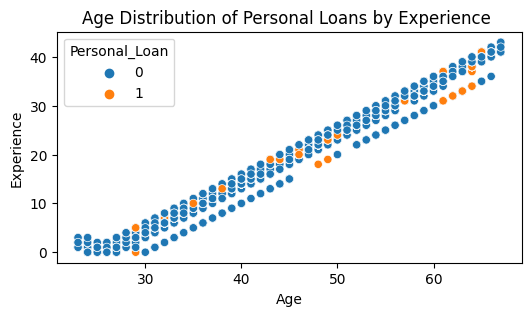

In [19]:
plt.figure(figsize = (6,3))
sns.scatterplot(df, x='Age', y='Experience', hue='Personal_Loan')
plt.title('Age Distribution of Personal Loans by Experience ');

We can see from the dataset that there is an healthy spread of industry experience with the population who interacted with the advert. The group of people who took the most loans where people over the age of 40 years and had over 15years of experience. Also, there is a linear corroletion between Age and Experience.

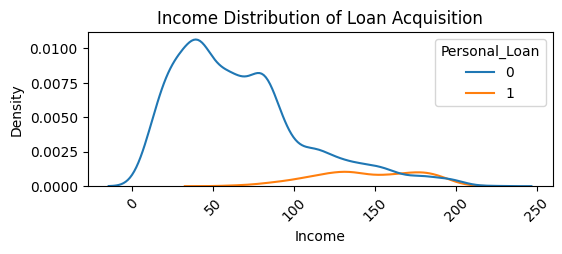

In [20]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='Income', hue='Personal_Loan')
plt.xticks(rotation =45)
plt.title('Income Distribution of Loan Acquisition');

From the plot above we can see that people earned above 30k were the ones who secured personal loans. Generally, from the graph customers who mostly earned where the ones who secured more loans

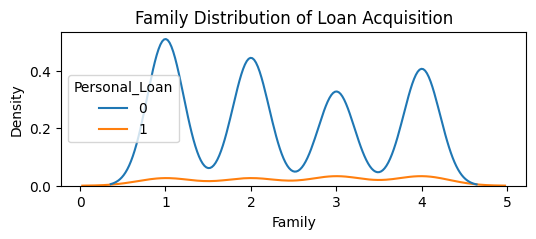

In [21]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='Family', hue='Personal_Loan')
plt.title('Family Distribution of Loan Acquisition');

From the chart above we can see that people of all family sizes secured a personal loan.

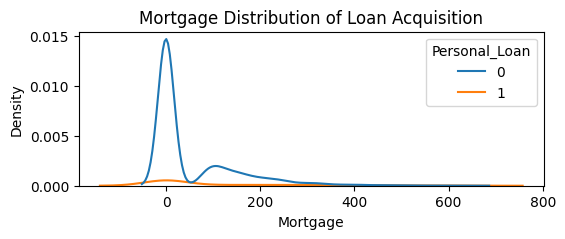

In [22]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='Mortgage', hue='Personal_Loan')
plt.title('Mortgage Distribution of Loan Acquisition');

From the above graph we can see that people with 0 mortgage had the highest population of people who did not secure a personal loan.

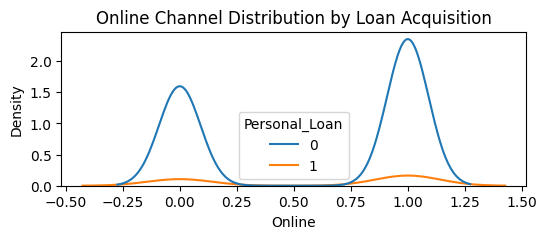

In [23]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='Online', hue='Personal_Loan')
plt.title('Online Channel Distribution by Loan Acquisition');

From the graph above we can see that at point 0 and 1 we had a larger set of our population who either acquired or did not acquire a loan.

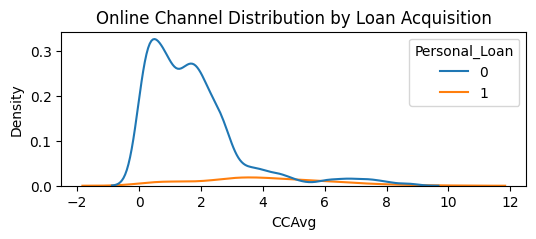

In [24]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='CCAvg', hue='Personal_Loan')
plt.title('Online Channel Distribution by Loan Acquisition');

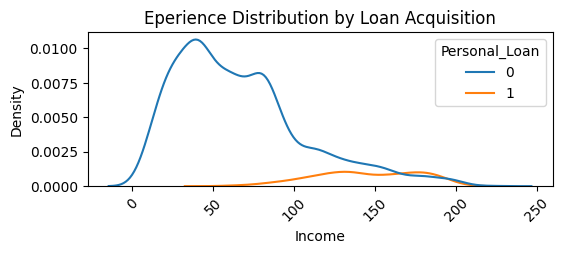

In [25]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='Income', hue='Personal_Loan')
plt.xticks(rotation =45)
plt.title('Eperience Distribution by Loan Acquisition');

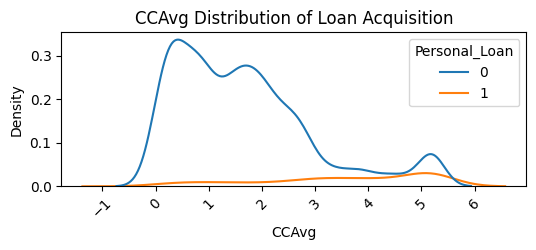

In [177]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='CCAvg', hue='Personal_Loan')
plt.xticks(rotation =45)
plt.title('CCAvg Distribution of Loan Acquisition');

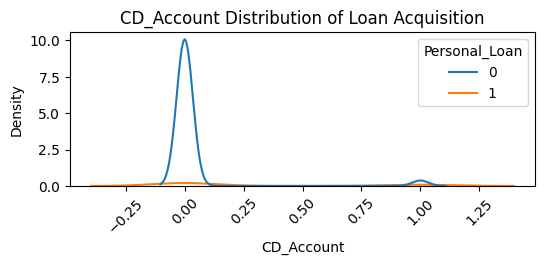

In [179]:
plt.figure(figsize = (6,2))
sns.kdeplot(df, x='CD_Account', hue='Personal_Loan')
plt.xticks(rotation =45)
plt.title('CD_Account Distribution of Loan Acquisition');

#### **Heatmap**

<Axes: >

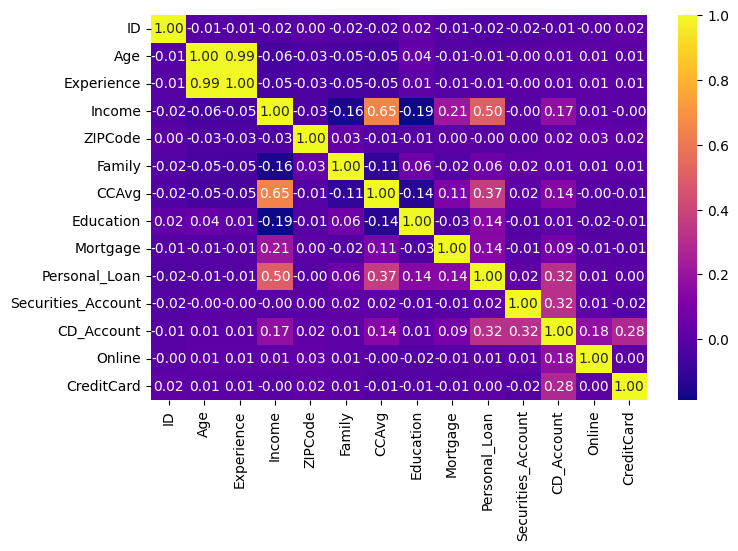

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

From the heatmap we can see that our target personal loan has correlation with income,CCAvg and CD_Account, Also, there is a strong correlation between age and Experience, also we have correlation between income and CCAvg these are potential multicorellation problems if we were to be solving a regression problem, but for classification we are good.

#### **Outlier Detection**

In [27]:
df_skewed = df[['CCAvg','Income','Mortgage']] # A variable created to contain our numeric data type

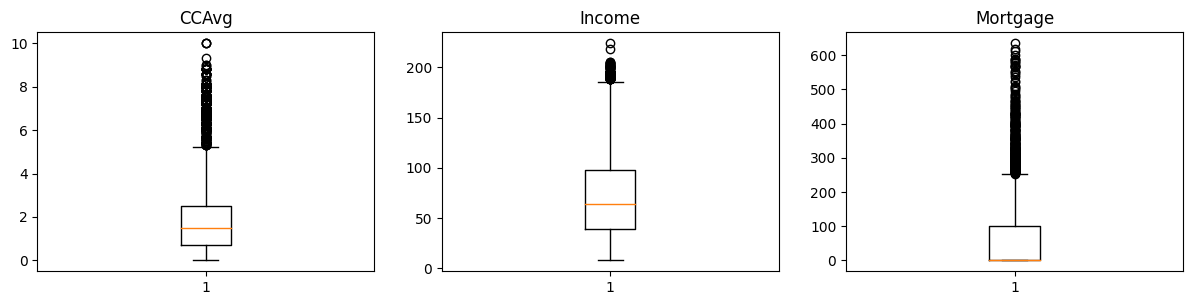

In [28]:
#OUTLIER DETECTION

plt.figure(figsize = (20, 18)) #presetting the size of our plot

for i, var in enumerate(df_skewed): #looping through our numeric data to create their individual plots with the code following below
    plt.subplot(5, 4, i + 1) 
    plt.boxplot(df[var])
    plt.title(var);

From our chart above we can see that the mortgage, CCAvg and incomes column have outliers. These outliers with be treated by adjusting the outlier to either the upper or lower quantile as the column requires.

In [29]:
#A function that helps to adjust all our outliers to the the upper and lower quatile
def outlier_treatment(df_skewed, col):
    Q1 = df[col].quantile(0.25) #lower quantile
    Q3 = df[col].quantile(0.75) #Upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    
    return df

#Helps pass all the columns into out outlier treatment 
def all_outliertreatment(df, col_list ):
    for c in col_list:
        df = outlier_treatment(df, c)
        
    return df

In [30]:
#Passing our numeric dataset into the function and saving it back to our dataset
df = all_outliertreatment(df,df_skewed )

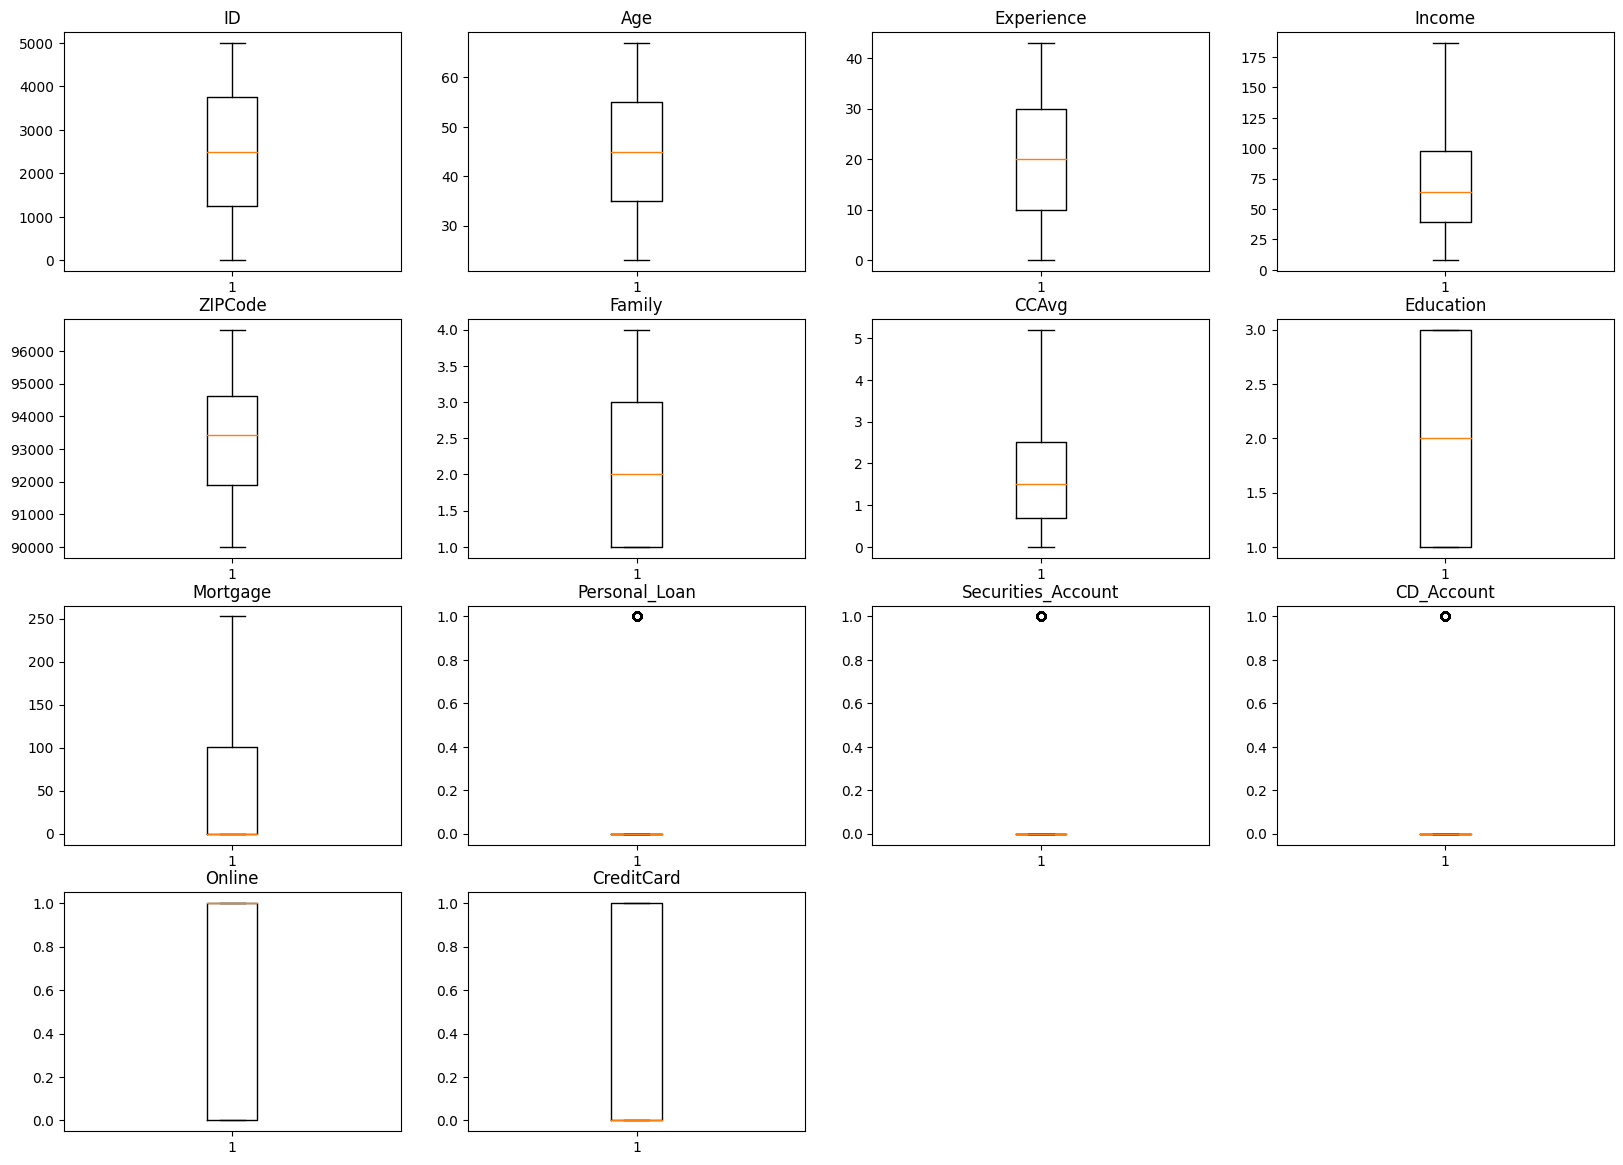

In [31]:
#Sanity Check
plt.figure(figsize = (20, 18))

for i, var in enumerate(df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var])
    plt.title(var);

Now we have treated all our outliers.

### **Building The Model**

The aim of building this model is to help the marketing team accurately predict potential customers who are most likely to secure a loan. For this, we will focus mostly on improving the precision score of which in the case will be the models ability to correctly predict (with few or no errors) customers who will secure a loan.

#### **Selecting The Features**

In [32]:
#Select our features
X = df.drop(columns =['Personal_Loan', 'ID'], axis = 1)

y = df['Personal_Loan']

In [130]:
#Checking all unique values of X
X.nunique()

Age                    45
Experience             44
Income                145
ZIPCode               467
Family                  4
CCAvg                  68
Education               3
Mortgage              180
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [34]:
#Checking all unique values of y
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

We can see that y is largely imbalanced with the positive value (people who secured a loan) having 480 values as opposed to the negative values(people who did not secured a loan) which is 4520.

#### **Spliting into Train, Test and Validation sets**

In [35]:
#train_test splitting
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

#### **Scalling the dataset**

Because most of our numeric columns are of different scales, we will need to place all the columns in one scale, so our model does not assign more weight or importance to any one column as opposed to another.

In [36]:
#scaling the dataset
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
x_val_sc = scaler.transform(x_val)

#### **Instantiating Our Model**

In [134]:
#instantiating logistic regression algorthm
log_reg = LogisticRegression(random_state=0) #Creating the regressor instance

#Building the model with training dataset
log_reg.fit(x_train_sc, y_train)

LogisticRegression(random_state=0)

In [38]:
#Making predictions with the train set
pred_train = log_reg.predict(x_train_sc)

pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, pred_train)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train, pred_train)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train, pred_train)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train, pred_train)))

Training-set accuracy score: 0.9566
Training-set precision score: 0.8525
Training-set f1 score: 0.7269
Training-set recall score: 0.6336


In [40]:
#Making predictions with the validation test
pred_val = log_reg.predict(x_val_sc)

In [41]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val,pred_val)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val,pred_val)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val,pred_val)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val,pred_val)))

Training-set accuracy score: 0.9475
Training-set precision score: 0.9310
Training-set f1 score: 0.7200
Training-set recall score: 0.5870


From the above we can see some difference between our model performance on training and testing, accuracy, f1 score, recall dropped at the was higher on the training dataset but dropped on the validation dataset. But for precision we realised that our training score was improved upon on the validation dataset. Keep in mind that our target data is imbalance imbalanced data, there are things that can be done to help us improve this model like balancing the data, using a different algorithm or tuning some hyperparameters.

#### **Balancing The Dataset**

We will use SMOTE to balance our data

In [42]:
#Creating and instance of smote
sm = SMOTE()
X_sm, y1 = sm.fit_resample(X, y)

In [131]:
#Sanity Check
y1.value_counts()

0    4520
1    4520
Name: Personal_Loan, dtype: int64

#### **Splitting The Balanced Dataset**

In [132]:
#Traini_test split on the balanced dataset
x_temp1, x_test1, y_temp1, y_test1 = train_test_split(X_sm, y1, test_size=0.2, random_state=42)
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

#### **Scaling Our Balanced Data**

In [45]:
#Sacaling the balanced dataset
scaler = StandardScaler()

x_train_b = scaler.fit_transform(x_train1)
x_test_b = scaler.transform(x_test1)
x_val_b = scaler.transform(x_val1)

#### **Instantiating the Model**

In [180]:
#instantiating logistic regression algorthm
log_reg_b = LogisticRegression(random_state=0) #Creating the regressor instance

#Building the model with training dataset
log_reg_b.fit(x_train_b, y_train1)

LogisticRegression(random_state=0)

In [181]:
#Making predictions with the train test
pred_train_b = log_reg_b.predict(x_train_b)

In [182]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, pred_train_b)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train1, pred_train_b)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train1, pred_train_b)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train1, pred_train_b)))

Training-set accuracy score: 0.9566
Training-set precision score: 0.8525
Training-set f1 score: 0.7269
Training-set recall score: 0.6336


In [183]:
#Making predictions with the train test
pred_val_b = log_reg_b.predict(x_val_b)

In [184]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val1, pred_val_b)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val1, pred_val_b)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val1, pred_val_b)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val1, pred_val_b)))

Training-set accuracy score: 0.9475
Training-set precision score: 0.9310
Training-set f1 score: 0.7200
Training-set recall score: 0.5870


From the evaluation metrics, we can see that the unbalanced data did better that the balanced data in the evaluation score figures but also maintained a higher value for the precision score on the validation dataset.

#### **Confusion matrics on validation dataset**

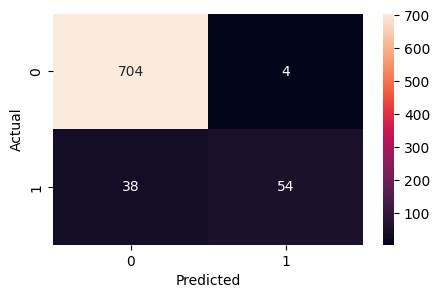

In [185]:
log_confusion_matrix = metrics.confusion_matrix(y_val1, pred_val_b)

plt.figure(figsize =(5, 3))
sns.heatmap(log_confusion_matrix, annot=True, fmt = '.4g')
plt.ylabel('Actual')
plt.xlabel('Predicted');

**From our confusion matrix:**

*   TN is 704 which is the model correctly predicted that 704 customers will not secure a loan.
*   FP is 4 which means that the model wrongly predicted that 4 customers 
will not secure a loan but they will not. 
*   TP is 54 which means that the model correctly predicted that 54 customers secured a loan.
*   FN is 38 which means that the model wrondly predicted that 38 will not secure a loan but they did.

**key Point**

The model produced from the imbalanced data performed better for accuracy, recall and f1 on the training but performed better on the precision score for the validation set. We will try other algorthm to see if we can get a better performing model.

#### **Decision Tree on the balanced data**

In [186]:
#Instantiating the algorthm
d_tree = DecisionTreeClassifier(random_state=0)

#Building the model
d_tree.fit(x_train_b, y_train1)

DecisionTreeClassifier(random_state=0)

In [187]:
#Making predictions with the train test
pred_train_dec = d_tree.predict(x_train_b)

In [188]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, pred_train_dec)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train1, pred_train_dec)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train1, pred_train_dec)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train1, pred_train_dec)))

Training-set accuracy score: 1.0000
Training-set precision score: 1.0000
Training-set f1 score: 1.0000
Training-set recall score: 1.0000


From the above score we can see that our model is perfect, let us see how it performs on our validation set.

In [189]:
#Making predictions with the validation dataset
pred_val_dec = d_tree.predict(x_val_b)

In [190]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val1, pred_val_dec)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val1, pred_val_dec)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val1, pred_val_dec)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val1, pred_val_dec)))

Training-set accuracy score: 0.9712
Training-set precision score: 0.9059
Training-set f1 score: 0.8701
Training-set recall score: 0.8370


From the above score we can see that our model did not performs perfectly as it did on the training set. We can say that this model overfits.

##### **Model Improvement(manual)**

In [191]:
#Instatiating the decision tree classifier
d_tree1 = DecisionTreeClassifier(random_state=0, max_depth=4)

#Building the model
d_tree1.fit(x_train_b, y_train1)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [192]:
#Making predictions with the train test
pred_train_dec1 = d_tree1.predict(x_train_b)

In [193]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, pred_train_dec1)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train1, pred_train_dec1)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train1, pred_train_dec1)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train1, pred_train_dec1)))

Training-set accuracy score: 0.9884
Training-set precision score: 0.9705
Training-set f1 score: 0.9343
Training-set recall score: 0.9007


In [194]:
pred_val_dec1 = d_tree1.predict(x_val_b)

In [195]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val1, pred_val_dec1)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val1, pred_val_dec1)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val1, pred_val_dec1)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val1, pred_val_dec1)))

Training-set accuracy score: 0.9688
Training-set precision score: 0.9718
Training-set f1 score: 0.8466
Training-set recall score: 0.7500


Like the previous model, the decision tree model with the tuned hyper parameters did well on the precision score as opposed to the untuned d_tree model.

**Visualising the Tree**

In [152]:
#Importing the libraries
import pydotplus
from IPython.display import Image
from sklearn.tree import plot_tree

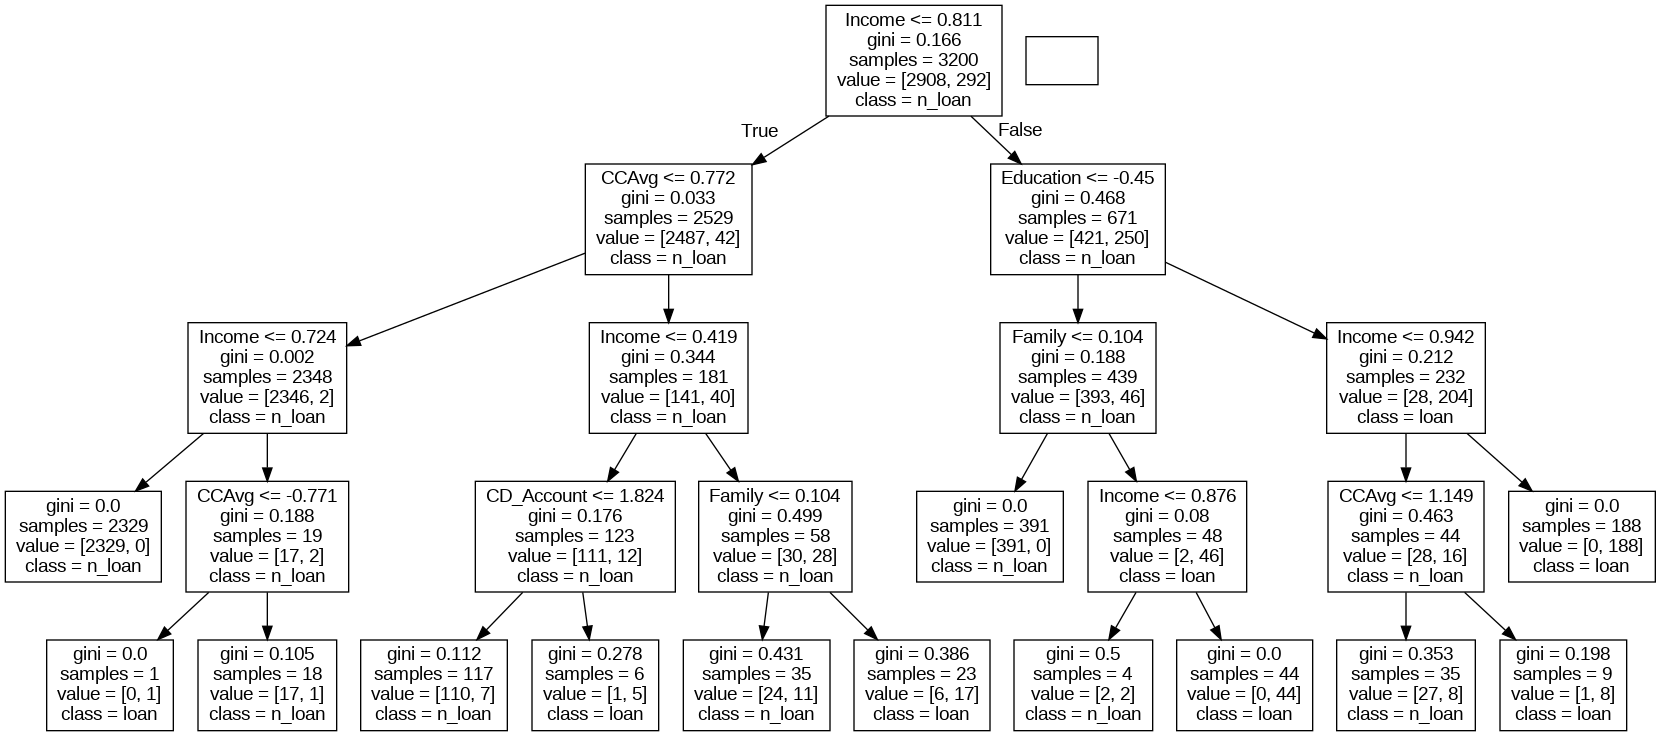

<Figure size 800x600 with 0 Axes>

In [196]:
dot_data = tree.export_graphviz(d_tree1, out_file=None, feature_names=X_sm.columns, class_names=['n_loan', 'loan'])

plt.figure(figsize = (8, 6))
# create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# generate the tree image
image = Image(graph.create_png())

# display the image
image


##### **Visualising the Feature Importance**

We are trying to visualise the features that contributed more to the model 

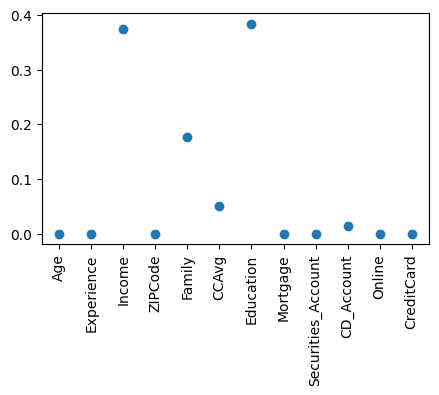

In [197]:
plt.figure(figsize = (5, 3))
plt.plot(d_tree1.feature_importances_, 'o')
plt.xticks(range(X_sm.shape[1]), X_sm.columns, rotation = 90)
plt.show()

We see that income, family size, CCAvg, CD_Account and education where the best 5 contributors to the model.

We will try Random Forest algorthm to build another model and observe further.

##### **Using Random Forest**

In [198]:
#Instantiate the random forest model
rf = RandomForestClassifier(random_state=0)

#Train the model
rf.fit(x_train_b, y_train1)

RandomForestClassifier(random_state=0)

In [199]:
#Predicting the training dataset
pred_train_rf = rf.predict(x_train_b)

In [200]:
#Checking the training scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, pred_train_rf)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train1, pred_train_rf)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train1, pred_train_rf)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train1, pred_train_rf)))

Training-set accuracy score: 1.0000
Training-set precision score: 1.0000
Training-set f1 score: 1.0000
Training-set recall score: 1.0000


In [201]:
#Predicting the validation dataset
pred_val_rf = rf.predict(x_val_b)

In [202]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val1, pred_val_rf)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val1, pred_val_rf)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val1, pred_val_rf)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val1, pred_val_rf)))

Training-set accuracy score: 0.9800
Training-set precision score: 1.0000
Training-set f1 score: 0.9048
Training-set recall score: 0.8261


The Random Forest Model does great at both training and validation for the precision score.

##### **Visualising The Feature Importance**

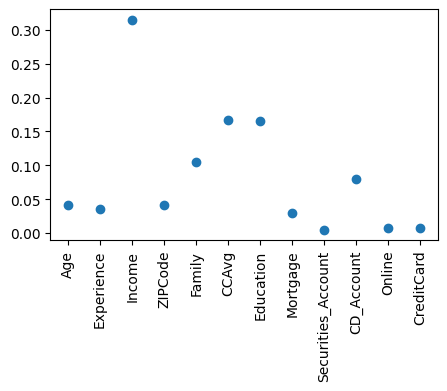

In [203]:
#Visualising the features Contributions
plt.figure(figsize = (5, 3))
plt.plot(rf.feature_importances_, 'o')
plt.xticks(range(X_sm.shape[1]), X_sm.columns, rotation = 90)
plt.show()

Like the decision tree algorithm built with random forest also sees income,family, CCAvg, Education  and CD_Account as contributing to the model.

We will further build our model with gradient boosting to see how best it performs with our model.

##### **Gradient Boosting**

In [204]:
#Instantiating the algorithm
gb = GradientBoostingClassifier(random_state=0)

#building the model
gb.fit(x_train_b,y_train1)

GradientBoostingClassifier(random_state=0)

In [205]:
#Making predictions on the train set
pred_train_gb = gb.predict(x_train_b)

In [206]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, pred_train_gb)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train1, pred_train_gb)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train1, pred_train_gb)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train1, pred_train_gb)))

Training-set accuracy score: 0.9956
Training-set precision score: 0.9929
Training-set f1 score: 0.9756
Training-set recall score: 0.9589


In [208]:
#Making predictions on the validation set
pred_val_gb = gb.predict(x_val_b)

In [209]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val1, pred_val_gb)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val1, pred_val_gb)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val1, pred_val_gb)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val1, pred_val_gb)))

Training-set accuracy score: 0.9775
Training-set precision score: 0.9512
Training-set f1 score: 0.8966
Training-set recall score: 0.8478


The model slightly overfits

##### **Model improvement using GridSearch and Randomised GridSearch**

These are hyperparameter tuning techniques which automatically populates hyperparameters and their values that gives the best results.

In [210]:
#import the grid search model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Set parameters to be tuned
param_grid = {'learning_rate':[0.001, 0.01,0.1,1,10], 'max_depth': list(range(1,5))}


#Instantiate the gridsearch on our gradient boost (gb) models
grid = GridSearchCV(gb, param_grid, cv =5, n_jobs = -1, scoring = 'precision')

grid.fit(x_train_b,y_train1)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='precision')

In [211]:
best_params = grid.best_params_

best_params

{'learning_rate': 0.01, 'max_depth': 2}

In [212]:
best_score = grid.best_score_

best_score

1.0

**Rebuilding the gradient boost model with the new hyperparameters**

In [213]:
gb1 = GradientBoostingClassifier(**best_params, random_state=0)

gb1.fit(x_train_b,y_train1)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)

In [215]:
#Predicting the training dataset
pred_train_gb1 = gb1.predict(x_train_b)

In [216]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, pred_train_gb1)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train1, pred_train_gb1)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train1, pred_train_gb1)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train1, pred_train_gb1)))

Training-set accuracy score: 0.9681
Training-set precision score: 1.0000
Training-set f1 score: 0.7884
Training-set recall score: 0.6507


In [217]:
#Predicting the validation dataset
pred_val_gb1 = gb1.predict(x_val_b)

In [118]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val1, pred_val_gb1)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val1, pred_val_gb1)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val1, pred_val_gb1)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val1, pred_val_gb1)))

Training-set accuracy score: 0.9563
Training-set precision score: 1.0000
Training-set f1 score: 0.7651
Training-set recall score: 0.6196


We can see that with the hyperparameter values we our model generalised perfectly for the precision.

In [166]:
#Set parameters to be tuned on random forest
param_grid = {'criterion':['entropy', 'gini', 'log_loss'], 'max_depth': list(range(1,5))}


#Instantiate the models
rf_gri = RandomizedSearchCV(rf, param_grid, cv =5, n_jobs = -1, scoring = 'precision')

rf_gri.fit(x_train1,y_train1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4]},
                   scoring='precision')

In [167]:
best_score1 = rf_gri.best_score_

best_score1

1.0

In [168]:
best_par = rf_gri.best_params_

best_par

{'max_depth': 2, 'criterion': 'entropy'}

**Rebuilding the random forest model with the new hyperparameters** 


In [218]:
rf2 = RandomForestClassifier(**best_par, random_state=0)

rf2.fit(x_train_b,y_train1)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=0)

In [219]:
#predicting the training
pred_train_rf2 = rf2.predict(x_train_b)

In [220]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train1, pred_train_rf2)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_train1, pred_train_rf2)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_train1, pred_train_rf2)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_train1, pred_train_rf2)))

Training-set accuracy score: 0.9244
Training-set precision score: 1.0000
Training-set f1 score: 0.2924
Training-set recall score: 0.1712


In [221]:
#Predicting the validation 
pred_val_rf2 = rf2.predict(x_val_b)

In [222]:
#Checking the validation scores of our model
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_val1, pred_val_rf2)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_val1, pred_val_rf2)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_val1, pred_val_rf2)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_val1, pred_val_rf2)))

Training-set accuracy score: 0.8988
Training-set precision score: 1.0000
Training-set f1 score: 0.2136
Training-set recall score: 0.1196


We see that our model generalises well on precision  on both training and validation dataset

**Rebuilding the best model with the test set**


In [224]:
#Training model with the test set
rf = RandomForestClassifier(random_state=0)

rf.fit(x_test_b,y_test1)

RandomForestClassifier(random_state=0)

In [226]:
#Predicting the test dataset
rf_test_pred = rf.predict(x_test_b)

In [228]:
#Checking the validation scores of our model with test set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, rf_test_pred)))
print('Training-set precision score: {0:0.4f}'. format(precision_score(y_test1, rf_test_pred)))
print('Training-set f1 score: {0:0.4f}'. format(f1_score(y_test1, rf_test_pred)))
print('Training-set recall score: {0:0.4f}'. format(recall_score(y_test1, rf_test_pred)))

Training-set accuracy score: 1.0000
Training-set precision score: 1.0000
Training-set f1 score: 1.0000
Training-set recall score: 1.0000


We can see that on the training data our model performs perfectly on all the validation parameters.

##**Conclusion**


From the insights above we are able to make the following recommendations:

1.  The best performing model was the one built with random forest which generalised well with its default parameters, do well on the training dataset and generalising at 100% for the test dataset.

2.   Customers with high income, high education,a large family, high CCAvg and CD_Account are more likely to secure a loan. Hence marketing communication and collaterals should be created to appeal to people who fall under this groups.

